In [ ]:
# Обучение с учителем
# Задание 1

In [1]:
import warnings

warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [55]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 6, 4
%matplotlib inline

In [2]:
boston = load_boston()

In [23]:
b_data = boston['data']
b_target = boston['target']
feature_name = boston['feature_names']

In [33]:
X = pd.DataFrame(b_data, columns = feature_name)
y = pd.DataFrame(b_target, columns=['price'])

In [27]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [32]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = lr.predict(X_test)
y_pred.shape

(152, 1)

In [38]:
from sklearn.metrics import r2_score

In [39]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})
r2_score(check_test["y_pred"], check_test["y_test"])

0.669370269149561

In [ ]:
# Задание 2

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [42]:
model.fit(X_train, y_train.values[:,0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [43]:
y_pred_rfr = model.predict(X_test)
y_pred_rfr.shape

(152,)

In [44]:
check_test2 = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred_rfr,
})

check_test2.head(10)

,y_test,y_pred
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521
76,20.0,21.832284
316,17.8,19.895747
140,14.0,14.754118
471,19.6,21.240835
500,16.8,20.898658


In [45]:
r2_score(check_test2["y_pred"], check_test2["y_test"])

0.8479049999699443

In [ ]:
# Коэффициент R2 линейной регрессии 0,67 < 0,85 второй модели. Следовательно лучше модель с ансамблем деревьев. 
# Чем ближе коэффициент к 1 тем сильнее корреляция.

In [51]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

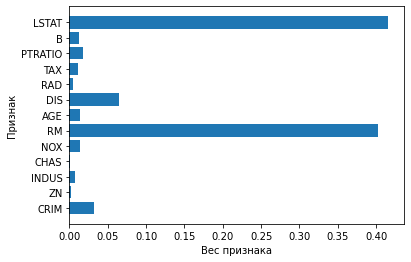

In [57]:
plt.barh(feature_name, model.feature_importances_)

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [59]:
np.sum(model.feature_importances_)

1.0

In [ ]:
# Наиболее весомые характеристики - LSTAT и RM